# Exploratory analysis of annual shoot

- AIM1: freq dist per each rank --> nb of shoots
- AIM2: relationship length (node) ~ length (cm)
- AIM3: relationship length(cm) ~ diameter (mm)
  
data:deruta 2020
PhD: Francesca Grisafi


In [1]:
import importnb
import sys
import pandas as pd

# Add the resolved path to sys.path
sys.path.insert(0, "../../../../Scripts")

# Import the notebooks
with importnb.Notebook():
    import Import_Dataset
    import Annual_shoot

In [5]:
file_paths = {
    'bud': "../../Data/bud.csv",
    'bud_proleptic': '../../Data/bud_proleptic.csv',
    'bud_sylleptic': '../../Data/bud_sylleptic.csv',
    'MV_bud_pro': '../../Data/MV_bud_pro.csv',
    'MV_bud_syl': '../../Data/MV_bud_syl.csv',
    'met_proleptic': '../../Data/met_proleptic.csv',
    'met_sylleptic': '../../Data/met_sylleptic.csv',
    'all_met_proleptic': '../../Data/all_met_proleptic.csv',
    'all_met_sylleptic': '../../Data/all_met_sylleptic.csv',
    'shoot': '../../Data/shoot.csv'
}

data = Import_Dataset.importdataset(**file_paths)

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/bud.csv'

## AIM1: freq dist per each rank --> nb of c,v,m,b, nuts, and sum of buds --------

In [22]:
import pandas as pd

def compute_freq_rank(shoot_df: pd.DataFrame, node_col = str):
    max_node = shoot_df[node_col].max()
    freq_rank = pd.DataFrame({'nb_shoots': [shoot_df[shoot_df[node_col] == i][node_col].count() for i in range(1, max_node + 1)]})
    return freq_rank

freq_rank = compute_freq_rank(shoot_df=shoot, node_col="node")
print(freq_rank.head())

   nb_shoots
0          1
1          4
2          6
3          8
4          6


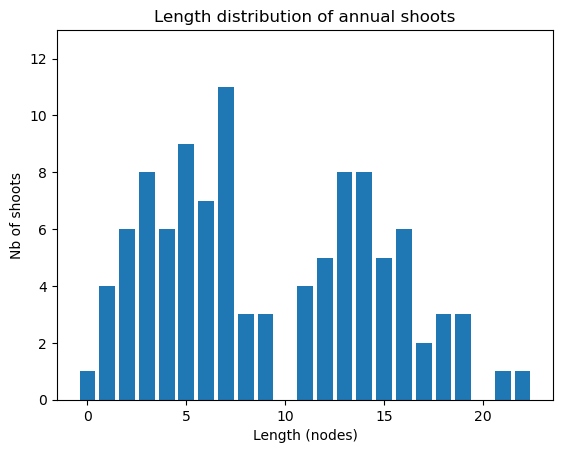

In [23]:
import matplotlib.pyplot as plt

def length_distribution(df: pd.DataFrame, max_nodes = int, title: str = 'Length distribution of annual shoots',
                       xlabel: str = 'Length (nodes)', ylabel: str = 'Nb of shoots'):
    plt.bar(df.index, df['nb_shoots'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0, max_nodes)
    return plt

plt = length_distribution(freq_rank, 13)
plt.show()

## AIM2: relationship length (node) ~ length (cm)

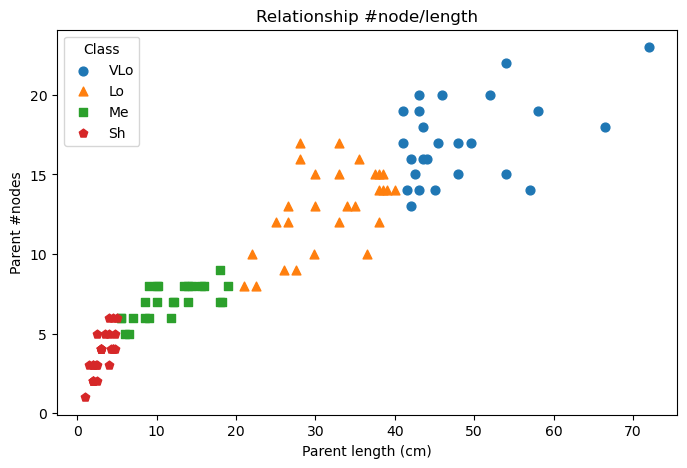

In [24]:
def length_nbnodes(df: pd.DataFrame, class_column: str, x_column: str,
                   y_column: str, size: int, 
                   title: str = 'Relationship #node/length',
                   xlabel: str = 'Parent length (cm)', ylabel: str = 'Parent #nodes'):
    for class_level, marker in zip(df['class'].unique(), ['o', '^', 's', 'p']):
        subset = df[df[class_column] == class_level]
        plt.scatter(subset[x_column], subset[y_column], marker=marker, label=class_level, s=size)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Class')
    return plt

plt.figure(figsize=(8, 5))
plt = length_nbnodes(shoot, "class", "length", "node", 40)
plt.show()

## AIM3: relationship length(cm) ~ diameter (mm)

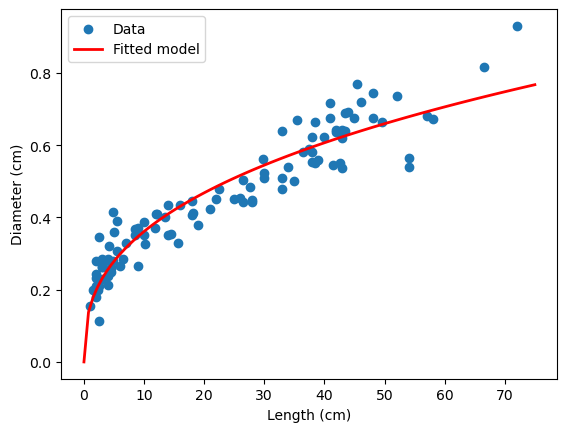

Parameters: a=0.15, b=0.37


In [28]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define a non linear function
# Ad esempio, una funzione potenza: y = a * x^b
def model_func(x, a, b):
    return a * (x ** b)

# Prepara i dati
xdata = shoot['length']
ydata = shoot['diam']

# Esegui il fitting del modello ai dati
# `popt` conterrà i parametri ottimizzati (a e b in questo caso)
popt, pcov = curve_fit(model_func, xdata, ydata, p0=[1, 1])

# Usa i parametri ottimizzati per predire i valori di y
xrange = np.linspace(0, 75, 100)
y_pred = model_func(xrange, *popt)

# plot data and model
plt.scatter(xdata, ydata, label='Data')
plt.plot(xrange, y_pred, color='red', linewidth=2, label='Fitted model')
plt.xlabel('Length (cm)')
plt.ylabel('Diameter (cm)')
plt.legend()
plt.show()

print(f"Parameters: a={popt[0]:.2f}, b={popt[1]:.2f}")
